In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
plt.style.use('ggplot')

### ForwardProgress vs NetSize

In [28]:
runs = []
for file in glob.iglob("./data/fProgress.delay*.size*trial.*.csv"):
    trial = re.search(r"trial\.([0-9]+)", file).group(1)
    data = pd.read_csv(file)
    data['Trial'] = int(trial)
    runs.append(data)
runs = pd.concat(runs, ignore_index = True)

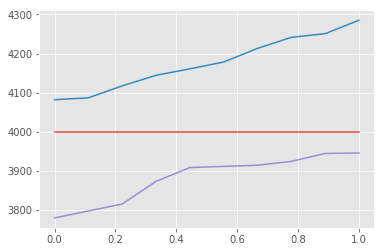

In [102]:
a = runs.groupby(["Trial","Peer"])[["Delay"]].max()
b = a.groupby(["Trial"])
qs = np.linspace(0,1, num=10)
c = b.quantile(qs).groupby(level=1)[["Delay"]]

plt.plot(qs, c.median())
plt.plot(qs, c.max())
plt.plot(qs, c.min())


In [103]:
c.describe()

Delay                                                               \
         count         mean        std          min     25%     50%     75%   
0.000000  50.0  3985.920000  53.178114  3780.000000  4000.0  4000.0  4000.0   
0.111111  50.0  3991.573333  51.379221  3797.777778  4000.0  4000.0  4000.0   
0.222222  50.0  3997.226667  53.896951  3815.555556  4000.0  4000.0  4000.0   
0.333333  50.0  4003.666667  53.913679  3873.333333  4000.0  4000.0  4000.0   
0.444444  50.0  4010.368889  55.974752  3908.666667  4000.0  4000.0  4000.0   
0.555556  50.0  4015.902222  61.138117  3911.555556  4000.0  4000.0  4000.0   
0.666667  50.0  4020.266667  67.786948  3914.666667  4000.0  4000.0  4000.0   
0.777778  50.0  4025.113333  75.474177  3924.333333  4000.0  4000.0  4000.0   
0.888889  50.0  4031.406667  84.120163  3944.666667  4000.0  4000.0  4000.0   
1.000000  50.0  4037.700000  94.757962  3946.000000  4000.0  4000.0  4000.0   

                       
                  max  
0.000000  4082.000000  
0.111111  4086.777778  
0.222222  4117.333333  
0.333333  4144.333333  
0.444444  4160.777778  
0.555556  4178.333333  
0.666667  4213.000000  
0.777778  4241.333333  
0.888889  4250.666667  
1.000000  4285.000000

### Tx Progress vs NetDelay

In [31]:
txRuns = []
for file in glob.iglob("./data/txProgress.delay*.size*trial.*.csv"):
    trial = re.search(r"trial\.([0-9]+)", file).group(1)
    data = pd.read_csv(file)
    data['Trial'] = int(trial)
    txRuns.append(data)
txRuns = pd.concat(txRuns, ignore_index = True)

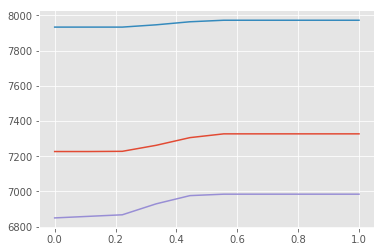

In [104]:
a = txRuns.groupby(["Trial","Peer"])[["Delay"]].max()
b = a.groupby(["Trial"])
qs = np.linspace(0,1, num=10)
c = b.quantile(qs).groupby(level=1)[["Delay"]]

plt.plot(qs, c.median())
plt.plot(qs, c.max())
plt.plot(qs, c.min())


### Branches

In [105]:
vRuns = []
for file in glob.iglob("./data/validate.delay*.size*trial.*.csv"):
    trial = re.search(r"trial\.([0-9]+)", file).group(1)
    data = pd.read_csv(file)
    data['Trial'] = int(trial)
    vRuns.append(data)
vRuns = pd.concat(vRuns, ignore_index = True)

In [108]:
numValidate = vRuns.groupby(["Trial", "Peer", "LedgerSeq"]).count()

In [112]:
(numValidate != 1).any()

LedgerID    False
dtype: bool

In [113]:
aRuns = []
for file in glob.iglob("./data/accept.delay*.size*trial.*.csv"):
    trial = re.search(r"trial\.([0-9]+)", file).group(1)
    data = pd.read_csv(file)
    data['Trial'] = int(trial)
    aRuns.append(data)
aRuns = pd.concat(aRuns, ignore_index = True)

In [120]:
numAccept = aRuns.groupby(["Trial", "Peer", "LedgerSeq"]).agg(['count'])

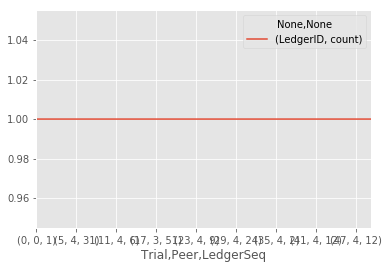

In [123]:
numAccept.plot()

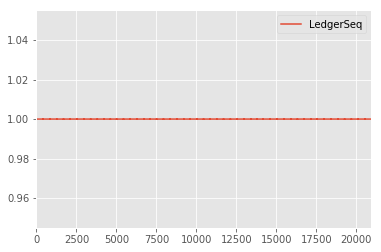

In [127]:
aRuns.groupby(["Trial", "Peer"])[["LedgerSeq"]].diff().plot()